# K - Neighbors Classifier
### 최근접 이웃 알고리즘(K-Nearest Neighbors, KNN)은 분류와 회귀 작업에 사용되는 비교 기반의 기계 학습 알고리즘.
### 새로운 데이터 포인트를 분류하거나 예측하기 위해 가장 가까운 K개의 이웃 데이터 포인트를 찾아 그들의 속성을 기반으로 결정을 내림.

- 주요 단계:
 1. 데이터 준비: 훈련 데이터셋을 준비

 2. 거리 계산: 새로운 데이터 포인트와 훈련 데이터 포인트 간의 거리를 계산. 일반적으로 유클리드 거리를 사용.(모든 점에 대해 계산하므로 속도가 느림)

 3. K-최근접 이웃 찾기: 가장 가까운 K개의 이웃을 찾기.

 4. 결정: 이웃의 속성을 기반으로 새로운 데이터 포인트를 분류하거나 예측.


- 장점:
 1. 간단하고 직관적: 알고리즘 구현이 간단하고 이해하기 쉽습니다.

 2. 정확도: 충분히 많은 데이터와 적절한 K 값을 선택하면 높은 정확도를 제공합니다.

- 단점:
 1. 성능: 큰 데이터셋에서는 계산이 많이 필요하며 실행 속도가 느립니다.

 2. 메모리 사용: 모든 훈련 데이터를 메모리에 저장해야 하므로 메모리 사용이 많이 필요합니다.


### 도미 길이 / 무게 데이터
from https://bit.ly/bream_list

In [3]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

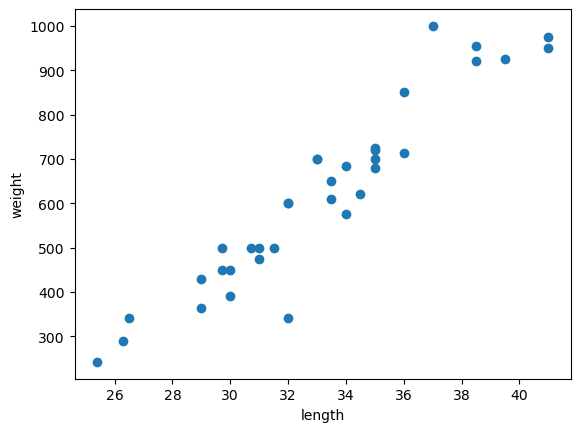

In [69]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

### 빙어 길이 / 무게
from http://bit.ly/smelt_list

In [16]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

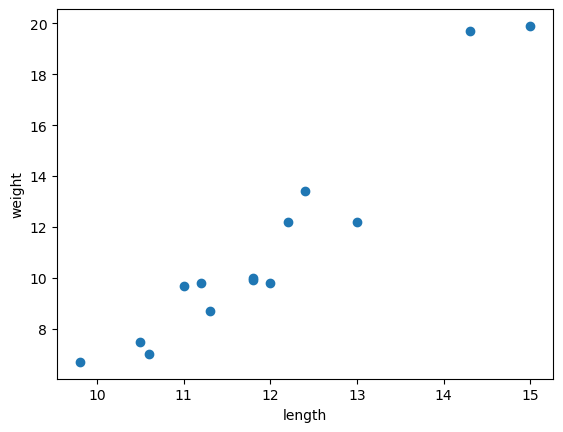

In [18]:
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

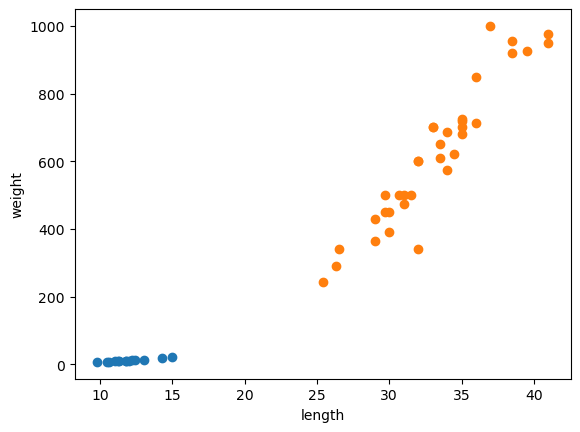

In [20]:
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [28]:
#데이터 통합 --> 분류모델 데이터로 활용할거임
length = smelt_length + bream_length
weight = smelt_weight + bream_weight

fish_data = [[l,w] for l,w in zip(length, weight)]
fish_data

[[9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9],
 [25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0]]

In [30]:
#label data 설정 (smelt = 0, bream = 1)
fish_target = [0] * 14 + [1] * 35

In [59]:
from sklearn.neighbors import KNeighborsClassifier

#kn = KNeigborsClassifier(n_neighbors = k) 로 참고할 데이터 개수 정할수 있음. 
#기본값은 5
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

#학습 data로 정확도를 분석했으므로 1.0이나옴
kn.score(fish_data, fish_target)

1.0

[1]


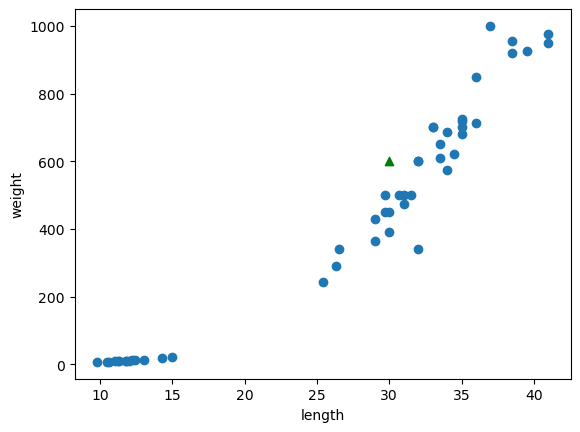

In [174]:
# 1이 출력되므로 도미라고 예측
print(kn.predict([[30,600]]))

np_fish = np.array(fish_data)
x = np_fish[:,0]
y = np_fish[:,1]
plt.scatter(x,y)
plt.scatter(30,600, color = 'green', marker = '^')
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

### ------------------------------------------------------------------------------------------------------------------

## 훈련세트와 테스트 세트

In [178]:
print("fish_data :",end ='') 
print(fish_data)
print("\n")
print("fish_target :",end ='') 
print(fish_target)

fish_data :[[9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9], [25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0]]


fish_target :[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [180]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
print(input_arr)
print(input_arr.shape)

[[   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]
 [  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]]
(49, 2)


In [182]:
#일정한 랜덤 값을 위해 시드 설정함
np.random.seed(42)

#0~48까지 배열 생성
index = np.arange(49) 
np.random.shuffle(index)

print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [184]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

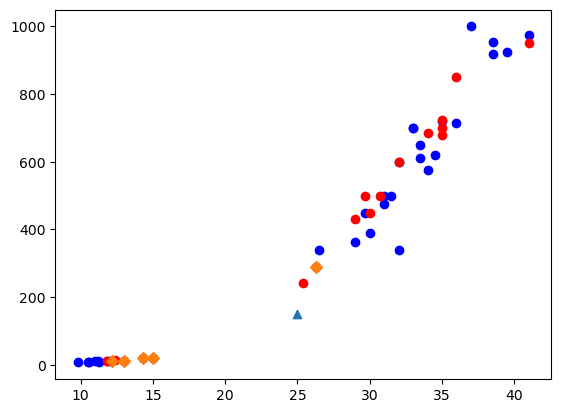

array([0])

In [198]:
# train data / test data 시각화
# 샘플링 편향이 없어진걸 확인 할 수 있음
# 학습데이터 -> 파란점
# 평가데이터 -> 빨간점
plt.scatter(train_input[:,0], train_input[:,1], color='blue')
plt.scatter(test_input[:,0], test_input[:,1], color = 'red')
    
plt.show()

kn.predict([[25,150]])
# 도미이지만 최근접한 쌍이 빙어가 많아 빙어로 잘못 판단한 케이스

In [166]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [168]:
kn.predict(test_input)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [204]:
test_target

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1])

### ----------------------------------------------------------------------------------------------

## 데이터 전처리

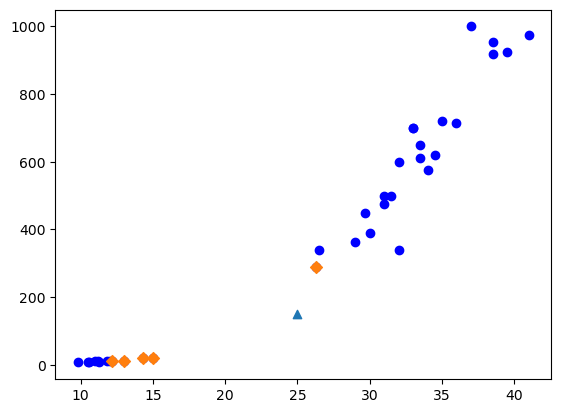

array([0])

In [202]:
# 학습데이터 분포
plt.scatter(train_input[:,0], train_input[:,1], color='blue')

# [25,150] -> 예측하고자 하는 점(삼각형)
# 학습데이터 중 [25,150]과 최근접한 k개의 점(다이아)
distance, indexes = kn.kneighbors([[25,150]])
plt.scatter(25,150,marker ='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')

plt.show()

kn.predict([[25,150]])

##### 도미이지만 최근접한 쌍이 빙어가 많아 빙어로 잘못 판단함
###### 현재의 분석의 문제는 표준화를 거치지 않고 주어지는 단위를 그대로 사용하여 문제가 생겼을 가능성이 있다
###### 특히 거리기반의 알고리즘일때 데이터를 표현하는 기준이 다르면 예측이 올바르지 않을 수 있음
###### 따라서 표준점수(z 점수)를 사용

In [220]:
mean = np.mean(train_input, axis = 0)
std = np.std(test_input, axis = 0)

print(mean, std)

[ 25.96285714 412.72      ] [  8.0848056  271.91925469]


In [233]:
train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std

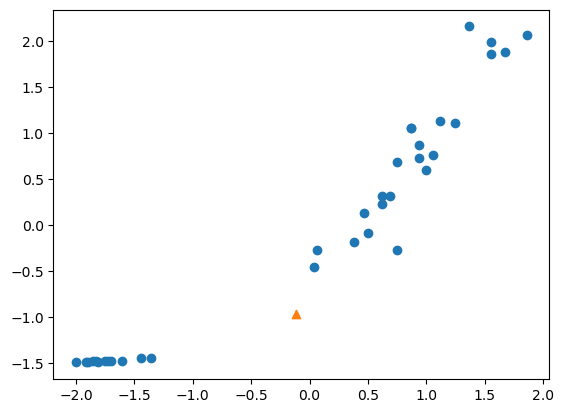

In [229]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
#plt.scatter(25, 150, marker = '^') -> [25,150]도 표준화
new = ([25,150]-mean)/std
plt.scatter(new[0], new[1], marker = '^')

plt.show()

In [243]:
kn.fit(train_scaled, train_target)

# 스케일링 후 정밀도 1.0
print("score :",end='')
print(kn.score(test_scaled, test_target))
print(kn.predict([new]))

score :1.0
[1]


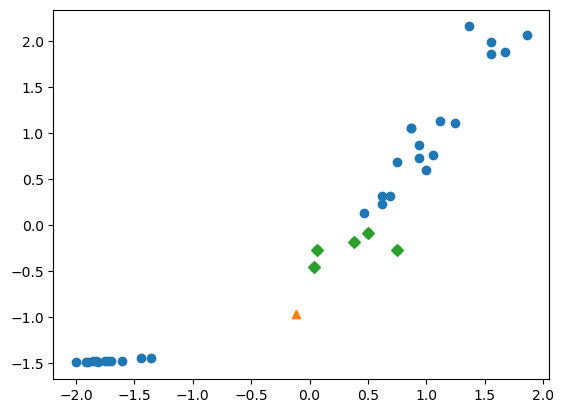

In [247]:
distance, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker = '^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.show()